In [100]:
#Importing signal data to Pandas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

signal_data = pd.read_csv('E:/Frankfurt University of Applied Sciences/Individual Project/Machine Learning/Raw_Data/adc_149.txt',delimiter='\t', header = None)
signal_data

,0,1,2,3,4,5,6,7,8,9,...,16390,16391,16392,16393,16394,16395,16396,16397,16398,16399
0,64,32768,1,1,512,0,1953125,12,0.0,2759,...,-6,-2,-1,3,3,10,14,18,22,26
1,64,32768,1,1,512,0,1953125,12,0.0,2761,...,-14,-15,-13,-8,-7,-3,1,5,13,14
2,64,32768,1,1,512,0,1953125,12,0.0,2759,...,22,24,21,18,16,12,12,13,4,-1
3,64,32768,1,1,512,0,1953125,12,0.0,2761,...,22,25,23,25,20,19,20,20,14,9
4,64,32768,1,1,512,0,1953125,12,0.0,2761,...,28,20,25,25,25,22,23,21,15,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,64,32768,1,1,512,0,1953125,12,0.0,2756,...,-16,-18,-19,-20,-20,-16,-18,-12,-9,-6
196,64,32768,1,1,512,0,1953125,12,0.0,2759,...,1,-6,-8,-12,-19,-19,-20,-20,-19,-20
197,64,32768,1,1,512,0,1953125,12,0.0,2759,...,4,0,-6,-10,-14,-21,-21,-16,-20,-22
198,64,32768,1,1,512,0,1953125,12,0.0,2759,...,-15,-23,-24,-22,-19,-23,-27,-27,-32,-34


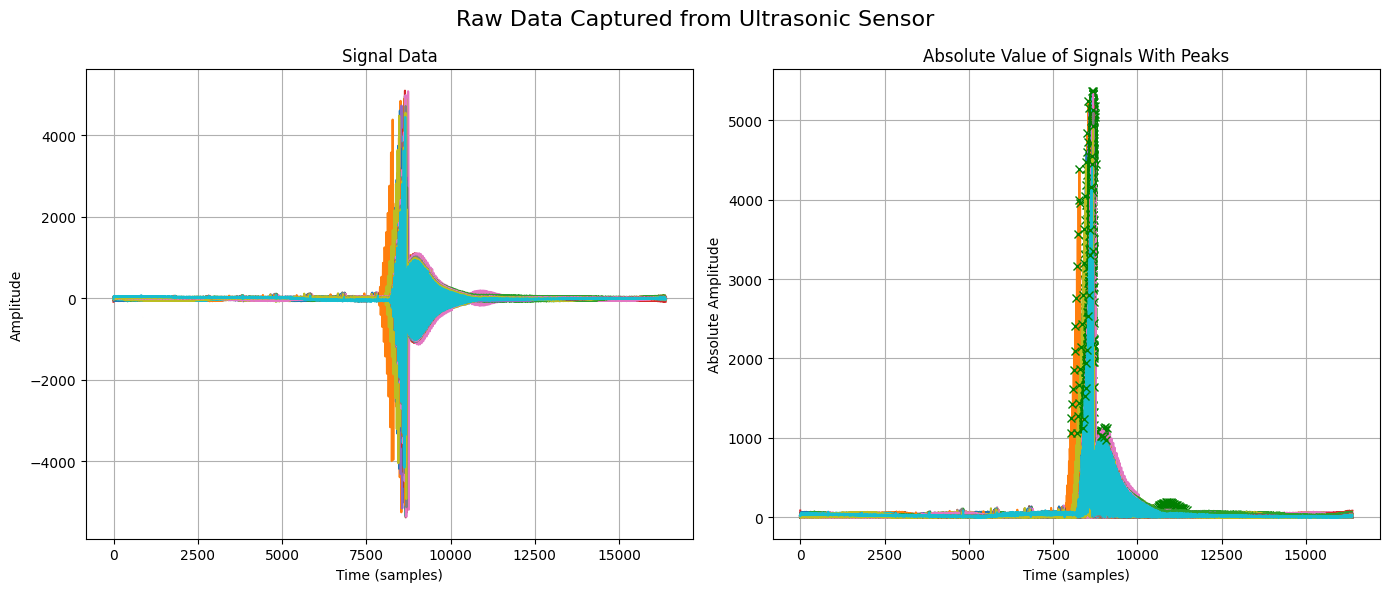

In [101]:
from scipy.signal import find_peaks

df = pd.DataFrame(signal_data)
signal_dictionary = []

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot all the signals
for i in range(df.shape[0]):
    # Ignoring the first 16 columns
    signal = df.iloc[i].iloc[16:]

    axs[0].plot(signal.values[:])

# Adding labels and title to the first subplot
axs[0].grid(True)
axs[0].set_xlabel('Time (samples)')
axs[0].set_ylabel('Amplitude')
axs[0].set_title('Signal Data')

# Plot all the signals with absolute values
for i in range(df.shape[0]):
    # Ignoring the first 16 columns
    signal = df.iloc[i].iloc[16:]
    absolute_signal = signal.abs()  # Taking the absolute values

    # Calculate mean and standard deviation of the absolute signal
    mean_signal = np.mean(absolute_signal)
    std_signal = np.std(absolute_signal)

    # Set prominence threshold dynamically based on mean and standard deviation
    prominence_threshold = mean_signal + 3 * std_signal  

    peaks, _ = find_peaks(absolute_signal.values[:], prominence=prominence_threshold)

    key = f'S{i+1}'
    signal_dictionary.append((key, absolute_signal, peaks))

    axs[1].plot(absolute_signal.values[:])
    axs[1].plot(peaks, absolute_signal.values[:][peaks], 'x', color='green')  # Plotting the peaks for visualization

# Adding labels and title to the second subplot
axs[1].grid(True)
axs[1].set_xlabel('Time (samples)')
axs[1].set_ylabel('Absolute Amplitude')
axs[1].set_title('Absolute Value of Signals With Peaks')

# Add a main title
fig.suptitle('Raw Data Captured from Ultrasonic Sensor', fontsize=16)

# Adjust layout
plt.tight_layout()
plt.show()

In [102]:
# Initialising the signal list dictionary where the updated signal data will be stored with real annotated peak
updated_signal_dictionary = []

# Function to plot the signal with peaks
# Used to annotate the real peak value in the signal data
def annotate_real_peaks():
    for key, signal, peaks in signal_dictionary:
        peak_values = signal.values[peaks]
        median_peak = np.median(peak_values)
        median_std = np.std(peak_values)

        #Calculate threshold multiplier k based on Z-score
        z_scores = (peak_values - median_peak) / median_std
        k = np.median(np.abs(z_scores))  # Use the average absolute Z-score as k

        threshold = median_peak + k * median_std

        # Plot signal and detected peaks
        #plt.figure(figsize=(12, 6))
        #plt.plot(signal.values[:])
        #plt.plot(peaks, signal.values[peaks], 'x', color='red')  # Plotting the detected peaks
        #plt.axhline(y=threshold, color='blue', linestyle='--', label=f'Threshold: {threshold:.2f}')
        #plt.title(f'Signal {key} with Detected Peaks')
        #plt.xlabel('Index')
        #plt.ylabel('Amplitude')
        #plt.legend()
        #plt.grid(True)
        #plt.show()

        # Filter peaks based on threshold
        filtered_peaks = [peak for peak in peak_values if peak <= threshold]

        print("Top Peaks in signal", key, ":", peak_values)
        print("Real peak value for signal", key, ":", median_peak)
        print("Median Std for signal", key, ":", median_std)
        print("Threshold for signal", key, ":", threshold)

        updated_signal_dictionary.append((key, signal, peaks, median_peak, median_std, threshold, filtered_peaks))
    return None

annotate_real_peaks()

Top Peaks in signal S1 : [1134 1318 1510 1706 1945 2202 2528 2895 3319 3737 4183 4593 5006]
Real peak value for signal S1 : 2528
Median Std for signal S1 : 1244.6093895453218
Threshold for signal S1 : 3546.0
Top Peaks in signal S2 : [1094 1297 1486 1700 1922 2201 2501 2898 3282 3722 4136 4586 3749 988 988
 1002 1002]
Real peak value for signal S2 : 1922
Median Std for signal S2 : 1200.7642606642578
Threshold for signal S2 : 2842.0
Top Peaks in signal S3 : [1070 1270 1444 1634 1861 2117 2430 2805 3188 3598 4019 4444 4444 964]
Real peak value for signal S3 : 2273
Median Std for signal S3 : 1194.4448629435537
Threshold for signal S3 : 3232.0
Top Peaks in signal S4 : [1106 1299 1483 1701 1929 2208 2516 2891 3294 3730 4159 4576 3843 1005 998]
Real peak value for signal S4 : 2208
Median Std for signal S4 : 1185.583693095234
Threshold for signal S4 : 3294.0
Top Peaks in signal S5 : [1122 1362 1524 1783 1979 2288 2582 3015 3387 3885 4301 4746 3439 1029
 1046 1040]
Real peak value for signal S5

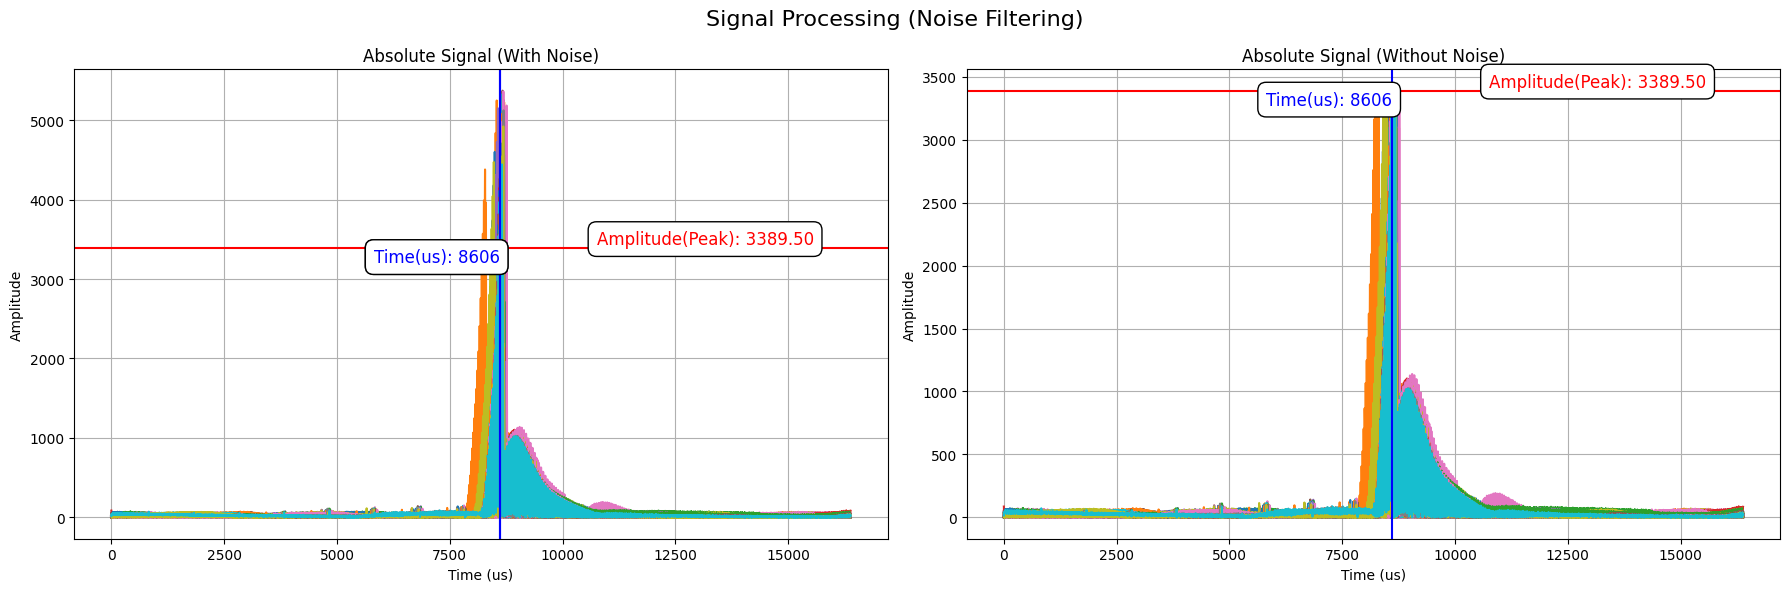

In [103]:
import matplotlib.pyplot as plt

# Extract all threshold values from updated_signal_dictionary
threshold_values = [element[5] for element in updated_signal_dictionary]  # Assuming threshold is stored at index 5

# Calculate the overall threshold as the median of all threshold values
overall_threshold = np.median(threshold_values)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Plot total signal with overall threshold line
for key, signal, peaks, median_peak, median_std, threshold, filtered_peaks in updated_signal_dictionary:
    axs[0].plot(signal.values, label=f'Signal {key}')

axs[0].axhline(y=overall_threshold, color='red', linestyle='-', label=f'Amplitude(Peak): {overall_threshold:.2f}')
axs[0].text(len(signal) - len(signal) // 20, overall_threshold + 0.05, f'Amplitude(Peak): {overall_threshold:.2f}', color='red', fontsize=12, ha='right', va='bottom', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

# Find the time index corresponding to the overall_threshold
overall_threshold_index = np.argmax(signal.values > overall_threshold)
# Annotate x-axis line with corresponding value
axs[0].axvline(x=overall_threshold_index, color='blue', linestyle='-', label=f'Time(us): {overall_threshold_index}')
axs[0].text(overall_threshold_index, overall_threshold - 0.05, f'Time(us): {overall_threshold_index}', color='blue', fontsize=12, ha='right', va='top', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

axs[0].axvline(x=overall_threshold_index, color='blue', linestyle='-', label=f'Time(us): {overall_threshold_index}')
axs[0].text(overall_threshold_index, overall_threshold - 0.05, f'Time(us): {overall_threshold_index}', color='blue', fontsize=12, ha='right', va='top', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

axs[0].set_xlabel('Time (us)')
axs[0].set_ylabel('Amplitude')
axs[0].set_title('Absolute Signal (With Noise)')
axs[0].grid(True)

# Plot total signal with values above the overall threshold eliminated
for key, signal, peaks, median_peak, median_std, threshold, filtered_peaks in updated_signal_dictionary:
    filtered_signal = signal.copy()
    filtered_signal[filtered_signal > overall_threshold] = 0
    axs[1].plot(filtered_signal.values, label=f'Signal {key}')

axs[1].axhline(y=overall_threshold, color='red', linestyle='-', label=f'Amplitude(Peak): {overall_threshold:.2f}')
axs[1].text(len(signal) - len(signal) // 20, overall_threshold + 0.05, f'Amplitude(Peak): {overall_threshold:.2f}', color='red', fontsize=12, ha='right', va='bottom', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

# Annotate x-axis line with corresponding value
axs[1].axvline(x=overall_threshold_index, color='blue', linestyle='-', label=f'Time(us): {overall_threshold_index}')
axs[1].text(overall_threshold_index, overall_threshold - 0.05, f'Time(us): {overall_threshold_index}', color='blue', fontsize=12, ha='right', va='top', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
axs[1].set_xlabel('Time (us)')
axs[1].set_ylabel('Amplitude')
axs[1].set_title('Absolute Signal (Without Noise)')
axs[1].grid(True)

# Add a main title
fig.suptitle('Signal Processing (Noise Filtering)', fontsize=16)

plt.tight_layout()
plt.show()


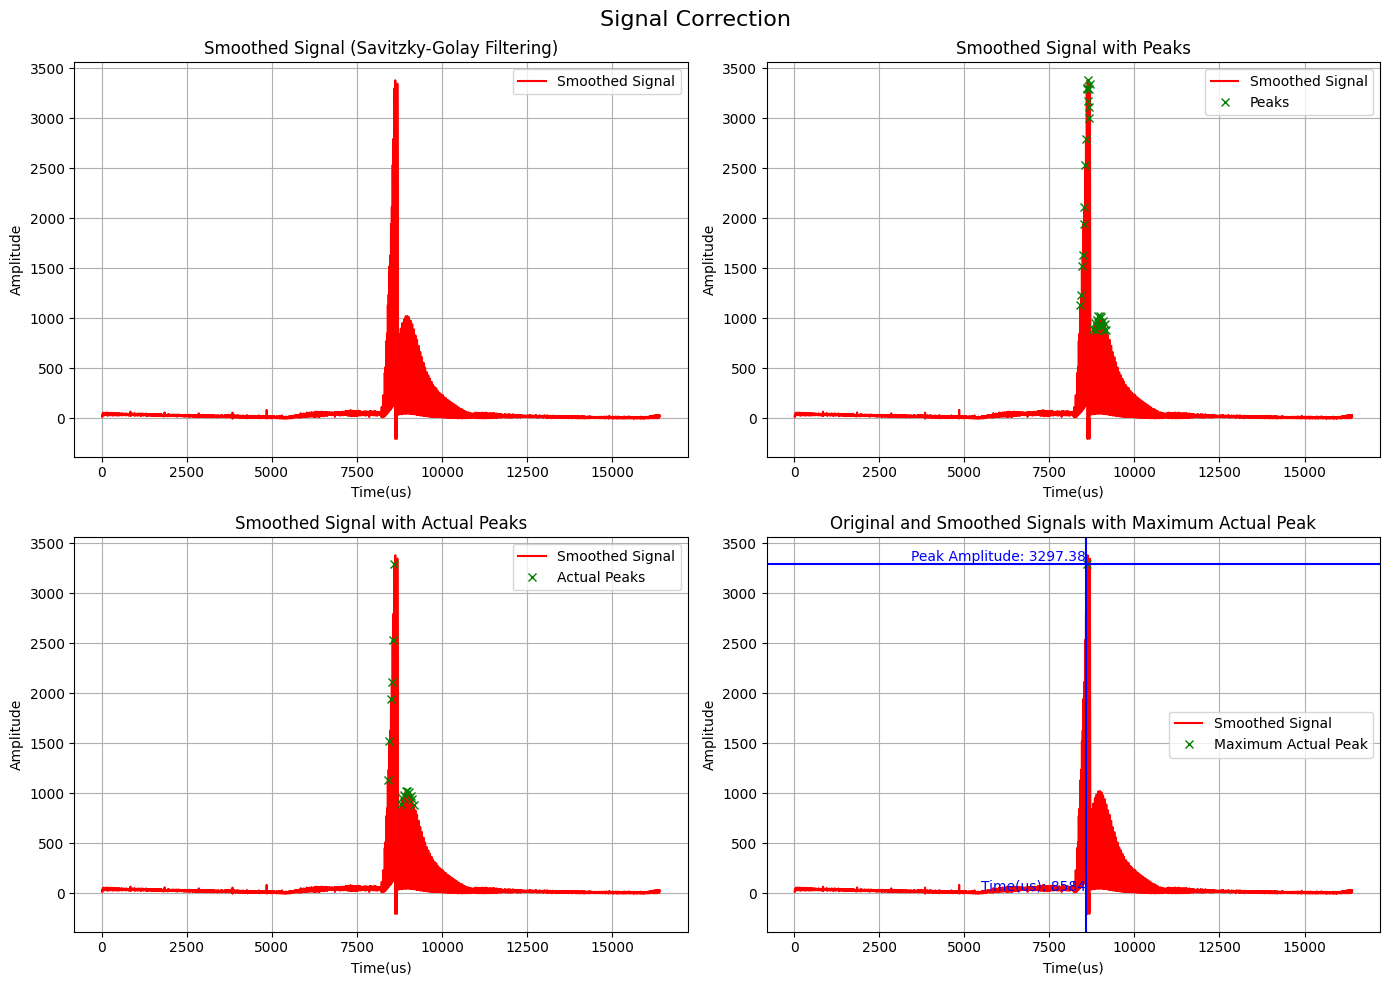

In [104]:
from scipy.signal import savgol_filter
from scipy.signal import find_peaks, peak_prominences
from scipy.signal import peak_widths

# Apply Savitzky-Golay filtering
window_length = 4  # Adjust the window length as needed
polyorder = 2  # Adjust the polynomial order as needed
smoothed_signal = savgol_filter(filtered_signal.values, window_length=window_length, polyorder=polyorder)

# Convert smoothed_signal to a DataFrame
smoothed_df = pd.DataFrame({'Index': filtered_signal.index, 'Smoothed Amplitude': smoothed_signal})

# Find peaks from the smoothed signal
peaks, _ = find_peaks(smoothed_df['Smoothed Amplitude'])

# Calculate the mean and standard deviation of the smoothed signal
mean_signal = smoothed_df['Smoothed Amplitude'].mean()
std_signal = smoothed_df['Smoothed Amplitude'].std()

# Set prominence threshold dynamically based on mean and standard deviation
prominence_threshold = mean_signal + 3 * std_signal  # Adjust the multiplier as needed

# Find peaks above the dynamically calculated prominence threshold
prominences = peak_prominences(smoothed_df['Smoothed Amplitude'], peaks)[0]
significant_peaks = peaks[prominences > prominence_threshold]

# Find widths of the peaks
widths, _, _, _ = peak_widths(smoothed_df['Smoothed Amplitude'], significant_peaks)

# Calculate the median width of the peaks
median_width = np.median(widths)

# Set the minimum width threshold dynamically
min_width = median_width  # You can also use mean or another percentile

# Filter out peaks based on width
actual_peaks = significant_peaks[widths > min_width]

# Find the index of the maximum peak among the actual peaks
max_peak_index = actual_peaks[np.argmax(smoothed_df['Smoothed Amplitude'][actual_peaks])]

# Plot all the figures as subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot smoothed signal
axs[0, 0].plot(smoothed_df['Index'], smoothed_df['Smoothed Amplitude'], label='Smoothed Signal', color='red')
axs[0, 0].set_xlabel('Time(us)')
axs[0, 0].set_ylabel('Amplitude')
axs[0, 0].set_title('Smoothed Signal (Savitzky-Golay Filtering)')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Plot smoothed signal with peaks
axs[0, 1].plot(smoothed_df['Index'], smoothed_df['Smoothed Amplitude'], label='Smoothed Signal', color='red')
axs[0, 1].plot(smoothed_df['Index'][significant_peaks], smoothed_df['Smoothed Amplitude'][significant_peaks], 'x', color='green', label='Peaks')
axs[0, 1].set_xlabel('Time(us)')
axs[0, 1].set_ylabel('Amplitude')
axs[0, 1].set_title('Smoothed Signal with Peaks')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Plot smoothed signal with actual peaks
axs[1, 0].plot(smoothed_df['Index'], smoothed_df['Smoothed Amplitude'], label='Smoothed Signal', color='red')
axs[1, 0].plot(smoothed_df['Index'][actual_peaks], smoothed_df['Smoothed Amplitude'][actual_peaks], 'x', color='green', label='Actual Peaks')
axs[1, 0].set_xlabel('Time(us)')
axs[1, 0].set_ylabel('Amplitude')
axs[1, 0].set_title('Smoothed Signal with Actual Peaks')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Plot original and smoothed signals with maximum actual peak
axs[1, 1].plot(smoothed_df['Index'], smoothed_df['Smoothed Amplitude'], label='Smoothed Signal', color='red')
axs[1, 1].plot(smoothed_df['Index'][max_peak_index], smoothed_df['Smoothed Amplitude'][max_peak_index], 'x', color='green', label='Maximum Actual Peak')
axs[1, 1].set_xlabel('Time(us)')
axs[1, 1].set_ylabel('Amplitude')
axs[1, 1].set_title('Original and Smoothed Signals with Maximum Actual Peak')
axs[1, 1].legend()
max_peak_amplitude = smoothed_df['Smoothed Amplitude'][max_peak_index]
axs[1, 1].axhline(y=max_peak_amplitude, color='blue', linestyle='-')
axs[1, 1].text(max_peak_index, max_peak_amplitude + 0.5, f'Peak Amplitude: {max_peak_amplitude:.2f}', color='blue', fontsize=10, ha='right', va='bottom')

# Highlight corresponding x-axis value
axs[1, 1].axvline(x=max_peak_index, color='blue', linestyle='-')
axs[1, 1].text(max_peak_index, 0.5, f'Time(us): {max_peak_index}', color='blue', fontsize=10, ha='right', va='bottom')
axs[1, 1].grid(True)
axs[1, 1].grid(True)

# Add a main title
fig.suptitle('Signal Correction', fontsize=16)
plt.tight_layout()
plt.show()


In [105]:
# Define constants
ADC_MAX_SAMPLE_FREQUENCY = 125000000  # Hz
ADC_SAMPLE_DECIMATION = 64
ADC_SAMPLE_FREQUENCY = ADC_MAX_SAMPLE_FREQUENCY / ADC_SAMPLE_DECIMATION  # Hz
ADC_SAMPLE_TIME = 8  # ns
ADC_SAMPLE_TIME_NS = ADC_SAMPLE_DECIMATION * ADC_SAMPLE_TIME  # ns
ADC_START_DELAY_US = int(0.30 * 2 * 1e6 / 343.2)  # µs
ADC_BUFFER_SIZE = 16384
ADC_BUFFER_DELAY_US = int((ADC_BUFFER_SIZE * ADC_SAMPLE_TIME_NS) / 1e3)  # µs
ADC_MID_US = ADC_START_DELAY_US + (ADC_BUFFER_DELAY_US // 2)  # µs

speed_of_sound = 343  # in meters per second

# Calculate the time interval based on the ADC sampling frequency
time_interval = 1 / ADC_SAMPLE_FREQUENCY  # in seconds

# Calculate TOF using max_peak_index and considering ADC delays
TOF = max_peak_index * time_interval + ADC_START_DELAY_US / 1e6  # Time of flight in seconds

# Convert TOF to distance
distance = TOF * speed_of_sound / 2  # Distance in meters

# Print the calculated distance
print("ADC Sample Frequency: {:.2f} Hz".format(ADC_SAMPLE_FREQUENCY))
print("Time Interval:", time_interval, "seconds")
print("Time of Flight (TOF):", TOF, "seconds")
print("Distance: {:.2f} meters".format(distance))

ADC Sample Frequency: 1953125.00 Hz
Time Interval: 5.12e-07 seconds
Time of Flight (TOF): 0.006143008 seconds
Distance: 1.05 meters
